In [4]:
# Importando biblioteca Pandas
import pandas as pd
# Importando biblioteca Matplotlib para plotar gráficos
import matplotlib.pyplot as plt
# Selecionano estilos de gráficos 

# Importando biblioteca locale para formatar valores na moeda brasileira
import locale
# Setando o locale para o Brasil (ajuste para o seu país se necessário)
locale.setlocale(locale.LC_ALL, 'pt_BR')

plt.style.use("bmh")

## Carregando uma base de dados a partir de um arquivo Excel

In [5]:
# Criando nosso dataframe
df = pd.read_excel('AdventureWorks.xlsx')

In [6]:
# Visualizando as colunas
print(df.columns)

Index(['Data Venda', 'Data Envio', 'ID Loja', 'ID Produto', 'ID Cliente',
       'No. Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor'],
      dtype='object')


In [7]:
# Contando valores nulos por coluna
print(df.isnull().sum())

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64


In [8]:
# Quantidade de linhas e colunas
df.shape

(904, 16)

In [9]:
# Verificando tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [10]:
# Visualizando uma amostra.
display(df.sample(2))

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
810,2009-02-22,2009-03-05,307,384,19117,200902223CS706,348.58,758.00,6,909.600,3638.400,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
758,2008-09-04,2008-09-16,199,2497,18868,200809045CS688,5.09,9.99,144,143.856,1294.704,Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White


## Criando uma função para formatar valores para a moeda brasileira

In [11]:
# Criando uma função para formatar os valores para a moeda brasileira
def moeda(valor):
    valor = locale.format_string("R$ %d", valor, grouping=True)
    return valor

## Qual o valor da receita total?

In [12]:
# Calculando a receita total
receita_total = df['Valor Venda'].sum()

# Formatando o número para o formato de moeda 
receita_formatada = locale.format_string("%d", receita_total, grouping=True)

# Criando a mensagem de saída
print(f'A receita total foi de R$ {receita_formatada}')

A receita total foi de R$ 5.984.606


## Qual o valor do custo total?

In [13]:
# Criando uma coluna com o custo total
df['Custo Total'] = df['Custo Unitário'] * df['Quantidade']

# Calculando a soma do custo total
custo_total = df['Custo Total'].sum()

# Formatando o número para o formato de moeda 
custo_formatado = locale.format_string("%d", custo_total, grouping=True)

# Criando a mensagem de saída
print(f'O custo total foi de R$ {custo_formatado}')

O custo total foi de R$ 2.486.783


## Quanto foi o lucro?

In [14]:
# Criando uma coluna com o valor do lucro no dataframe
df['Lucro'] = df['Valor Venda'] - df['Custo Total']

# Criando uma variável com o valor total de lucro
lucro = (df['Lucro'].sum())

# Formatando o número para o formato de moeda 
lucro_formatado = locale.format_string("%d", lucro, grouping=True)

# Criando a mensagem de saída
print(f'O lucro total foi de R$ {lucro_formatado}')

O lucro total foi de R$ 3.497.823


## Crie uma coluna com o tempo que levou para cada produto ser entregue, em dias

In [15]:
# Criando coluna com tempo de envio em dias
df['Tempo de Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

# Visualizando uma amostra.
display(df.sample(2))

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo de Envio
355,2008-04-30,2008-05-11,307,1203,19097,200804304CS558,324.69,980.0,11,2156.0,8624.0,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,3571.59,5052.41,11
625,2008-08-08,2008-08-17,306,366,19055,200808083CS608,348.58,758.0,5,379.0,3411.0,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,1742.90,1668.10,9


## Qual o valor médio de venda por produto?

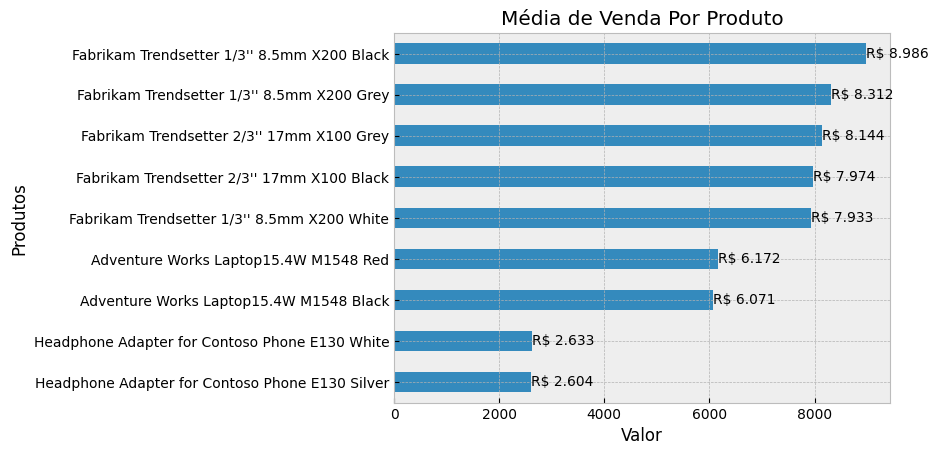

In [25]:
# Crie o gráfico de barras
ax = df.groupby('Produto')['Valor Venda'].mean().round(2).sort_values(ascending=True).plot.barh(title='Média de Venda Por Produto')

# Adicione os rótulos de dados (média de venda) em cada barra, formatando-os com a função moeda()
for i, v in enumerate(df.groupby('Produto')['Valor Venda'].mean().round(2).sort_values(ascending=True)):
    valor_formatado = moeda(v)  # Formate o valor usando sua função moeda()
    ax.text(v, i, valor_formatado, ha='left', va='center')

# Personalize os eixos
plt.xlabel('Valor')
plt.ylabel('Produtos')

# Exiba o gráfico
plt.show()

## Qual foi o lucro por ano e marca?

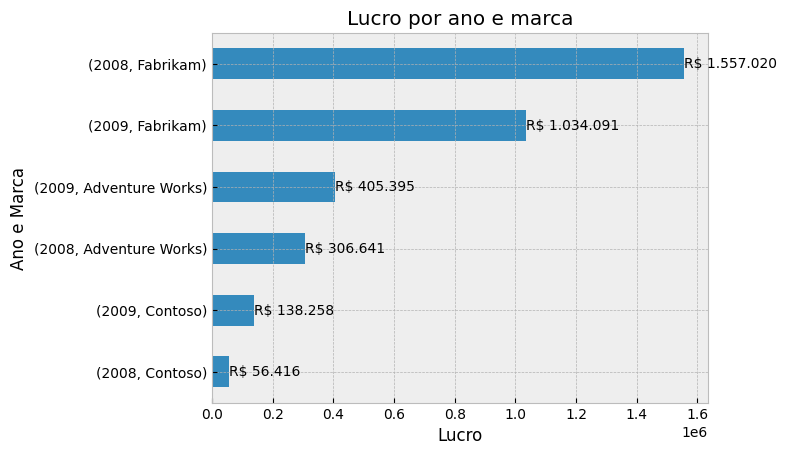

In [31]:
# Crie o gráfico de barras
ax = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().sort_values(ascending=True).plot.barh(title="Lucro por ano e marca")

# Adicione os rótulos de dados (lucro) em cada barra, formatando-os com a função moeda()
for i, v in enumerate(df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().sort_values(ascending=True)):
    valor_formatado = moeda(v)  # Formate o valor usando sua função moeda()
    ax.text(v, i, valor_formatado, ha='left', va='center')

# Personalize os eixos
plt.xlabel('Lucro')
plt.ylabel('Ano e Marca')

# Exiba o gráfico
plt.show()

## Qual o total de produtos vendidos?

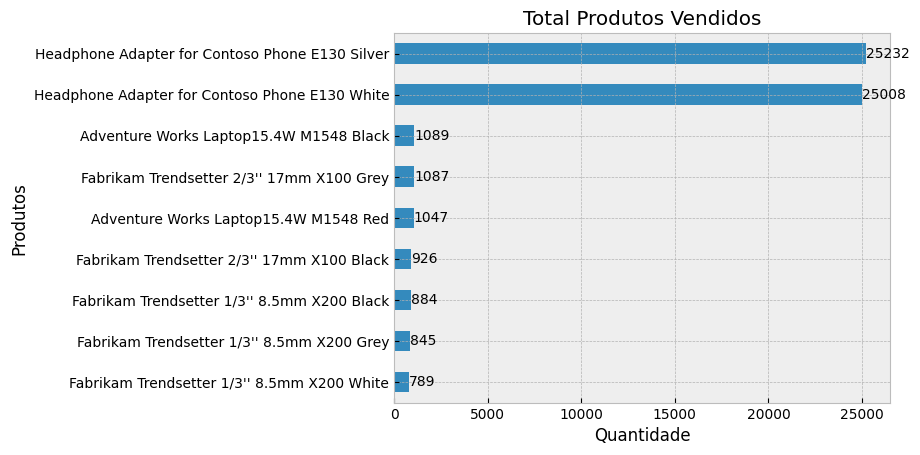

In [33]:
# Agrupando por produto e plotando em um gráfico
grupo_produto = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True)
ax = grupo_produto.plot.barh(title='Total Produtos Vendidos')

# Adicionando rótulos de dados a cada barra
for i, valor in enumerate(grupo_produto):
    ax.annotate(f'{valor}', xy=(valor, i), va='center')

# Configurando os rótulos dos eixos
plt.xlabel('Quantidade')
plt.ylabel('Produtos')

# Exibindo o gráfico
plt.show()

## Qual o lucro por ano?

TypeError: 'Axes' object is not iterable

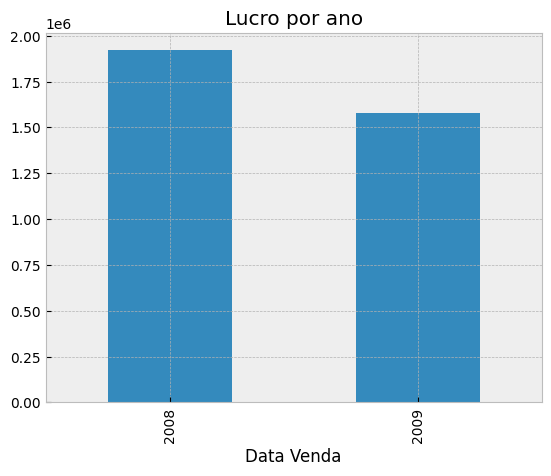

In [39]:
import matplotlib.pyplot as plt

# Agrupando o lucro por ano e plotando em um gráfico
grupo_produto = df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title='Lucro por ano')

# Adicionando rótulo para cada coluna
for i, valor in enumerate(grupo_produto):
    ax.annotate(f'{valor}', xy=(valor, i), va='center')

# Configurações adicionais do gráfico
plt.xticks(rotation='horizontal')
plt.xlabel("Ano")
plt.ylabel("Lucro")  # Adicionei o rótulo para o eixo y

# Exibindo o gráfico
plt.show()


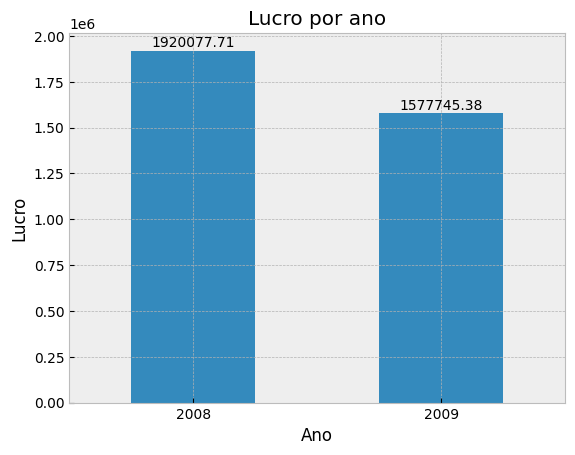

In [46]:
# Agrupando o lucro por ano
grupo_produto = df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

# Plotando em um gráfico de barras
ax = grupo_produto.plot.bar(title='Lucro por ano')

# Adicionando rótulo para cada coluna (acima da barra)
for i, valor in enumerate(grupo_produto):
    ax.annotate(f'{valor:.2f}', xy=(i, valor), xytext=(0, 3), textcoords="offset points", ha='center')

# Configurações adicionais do gráfico
plt.xticks(rotation='horizontal')
plt.xlabel("Ano")
plt.ylabel("Lucro")

# Exibindo o gráfico
plt.show()

In [37]:
# Somando lucro de 2008 e 2009 e atribuindo à variáves 
lucro_2008 = df.loc[df['Data Venda'].dt.year == 2008, 'Lucro'].sum()
lucro_2009 = df.loc[df['Data Venda'].dt.year == 2009, 'Lucro'].sum()
# calculando o percentual de diferença entre os anos
lucro_cresc = ((lucro_2009 / lucro_2008) -1)
lucro_cresc = format(lucro_cresc,".2%")

# Exibindo a comparação
print(f"O lucro de 2008 foi de {moeda(lucro_2008)} e em 2009 foi {moeda(lucro_2009)}. Equivalente a {lucro_cresc}")

O lucro de 2008 foi de R$ 1.920.077 e em 2009 foi R$ 1.577.745. Equivalente a -17.83%


## Qual o lucro por mês do ano de 2009?

<Axes: title={'center': 'Lucro por mês'}, xlabel='Data Venda'>

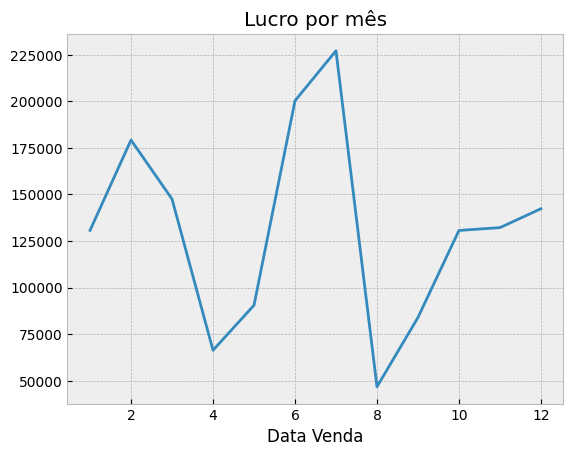

In [20]:
# Filtrando as vendas de 2009 e atribuindo a uma nota variável
df_2009 = df[df['Data Venda'].dt.year == 2009]

# Agrupando o lucro por ano e plotando gráfico
df_2009.groupby([df['Data Venda'].dt.month])['Lucro'].sum().plot(title='Lucro por mês')

(array([0, 1, 2]),
 [Text(0, 0, 'Adventure Works'),
  Text(1, 0, 'Contoso'),
  Text(2, 0, 'Fabrikam')])

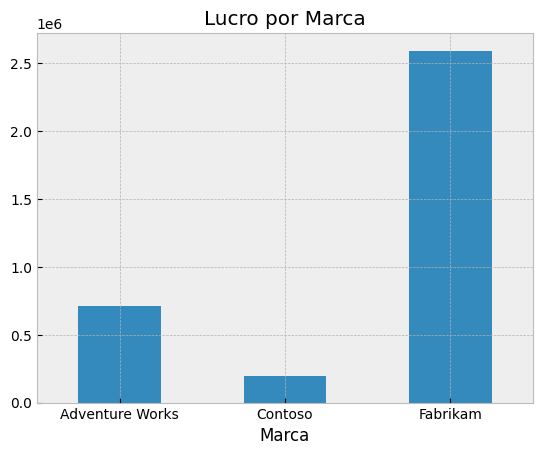

In [21]:
# Agrupando o lucro por marca e plotando em um gráfico
df.groupby([df['Marca']])['Lucro'].sum().plot.bar(title='Lucro por Marca')
plt.xticks(rotation='horizontal')

## Exibindo estatísticas sobre os dados

In [22]:
df['Tempo de Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo de Envio, dtype: float64

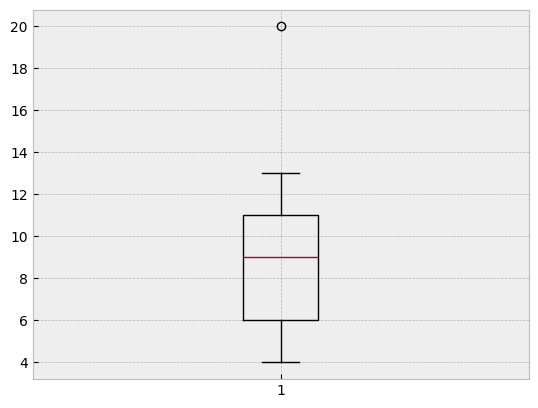

In [23]:
# Gráfico de boxplot do tempo de envio
plt.boxplot(df['Tempo de Envio']);

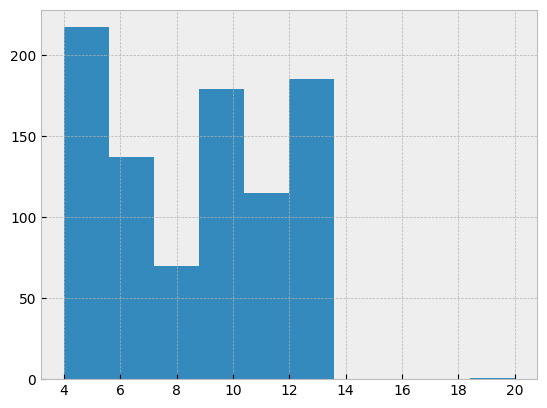

In [24]:
# Histograma do tempo de envio
plt.hist(df['Tempo de Envio']);